# Using the "mammographic masses" public dataset from the UCI repository 
(source: https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass)

In [1]:
import pandas as pd
columns = ['BI-RADS', 'Age', 'Shape', 'Margin', 'Density', 'Severity']
df = pd.read_csv('D:\DataScience-Python3\mammographic_masses.data.txt',na_values = '?',names=columns)

In [2]:
df.head()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


In [3]:
df.describe()

,BI-RADS,Age,Shape,Margin,Density,Severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [4]:
import numpy as np
df2 = df.dropna()
df2.corr()

,BI-RADS,Age,Shape,Margin,Density,Severity
BI-RADS,1.000000,0.094623,0.180120,0.157771,0.028356,0.223826
Age,0.094623,1.000000,0.380096,0.420913,0.052417,0.455216
Shape,0.180120,0.380096,1.000000,0.738014,0.073969,0.564763
Margin,0.157771,0.420913,0.738014,1.000000,0.124860,0.574498
Density,0.028356,0.052417,0.073969,0.124860,1.000000,0.068651
Severity,0.223826,0.455216,0.564763,0.574498,0.068651,1.000000


In [5]:
labels = df2['Severity'].values
feature_labels=columns[1:-1]
features = df2[feature_labels].values
features

array([[67.,  3.,  5.,  3.],
       [58.,  4.,  5.,  3.],
       [28.,  1.,  1.,  3.],
       ...,
       [64.,  4.,  5.,  3.],
       [66.,  4.,  5.,  3.],
       [62.,  3.,  3.,  3.]])

In [6]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
Scaler = StandardScaler()
features = Scaler.fit_transform(features)
features

array([[ 0.7650629 ,  0.17563638,  1.39618483,  0.24046607],
       [ 0.15127063,  0.98104077,  1.39618483,  0.24046607],
       [-1.89470363, -1.43517241, -1.157718  ,  0.24046607],
       ...,
       [ 0.56046548,  0.98104077,  1.39618483,  0.24046607],
       [ 0.69686376,  0.98104077,  1.39618483,  0.24046607],
       [ 0.42406719,  0.17563638,  0.11923341,  0.24046607]])

# Decision Tree

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

In [8]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

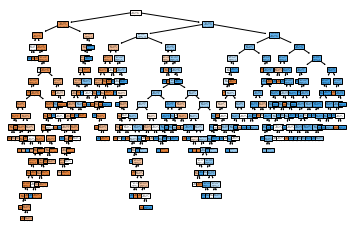

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure()
_ = tree.plot_tree(clf, feature_names=feature_labels, filled=True)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[78 27]
 [33 70]]
              precision    recall  f1-score   support

           0       0.70      0.74      0.72       105
           1       0.72      0.68      0.70       103

    accuracy                           0.71       208
   macro avg       0.71      0.71      0.71       208
weighted avg       0.71      0.71      0.71       208



In [11]:
from sklearn.model_selection import cross_val_score
from sklearn import svm

In [12]:
scores = cross_val_score(clf , features, labels, cv=10)
print('MEAN OF 10 SCORES ===   ', scores.mean())

MEAN OF 10 SCORES ===    0.736144578313253


In [13]:
from sklearn.ensemble import RandomForestClassifier
scores = cross_val_score(RandomForestClassifier(), features, labels, cv=10)
print('MEAN OF 10 SCORES ===   ', scores.mean())

#clf = RandomForestClassifier(n_estimators=50)
#clf = clf.fit(features, labels)
#clf.predict(X_test)
#print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))

MEAN OF 10 SCORES ===    0.7590361445783133


## SVM

In [14]:
clf = svm.SVC(kernel='linear', C=1,random_state=1).fit(X_train, y_train)

# Now measure its performance with the test data
clf.score(X_test, y_test)

0.8125

In [15]:
scores = cross_val_score(clf, features, labels, cv=10)
print('MEAN OF 10 SCORES ===   ', scores.mean())

MEAN OF 10 SCORES ===    0.7975903614457832


## KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier
#clf = KNeighborsClassifier(K=10)

In [17]:
bestofk = []
for K in range(1,50):
    scores = cross_val_score(KNeighborsClassifier(n_neighbors=K), features, labels, cv=10)
    bestofk.append(scores.mean())
max(bestofk)

0.7951807228915662

## Naive Bayes

In [18]:
from sklearn.naive_bayes import MultinomialNB

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(X_train)
scaled_test_features = scaler.fit_transform(X_test)

scaled_features

array([[0.58108108, 1.        , 0.75      , 0.66666667],
       [0.36486486, 1.        , 0.5       , 0.66666667],
       [0.66216216, 1.        , 0.5       , 0.66666667],
       ...,
       [0.54054054, 1.        , 0.75      , 0.66666667],
       [0.51351351, 1.        , 0.75      , 0.66666667],
       [0.58108108, 0.        , 1.        , 0.66666667]])

In [19]:
clf = MultinomialNB()
clf = clf.fit(scaled_features, y_train)

y_pred = clf.predict(scaled_test_features)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[75 30]
 [14 89]]
              precision    recall  f1-score   support

           0       0.84      0.71      0.77       105
           1       0.75      0.86      0.80       103

    accuracy                           0.79       208
   macro avg       0.80      0.79      0.79       208
weighted avg       0.80      0.79      0.79       208



In [20]:
scores = cross_val_score(clf, scaled_features, y_train, cv=10)
print('MEAN OF 10 SCORES ===   ', scores.mean())

MEAN OF 10 SCORES ===    0.778110599078341


## Revisiting SVM

RBF

In [21]:
clf = svm.SVC(kernel = 'rbf', C = 1).fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

scores = cross_val_score(clf,features, labels, cv = 10)
print(scores)
print(scores.mean())

[[77 13]
 [28 90]]
              precision    recall  f1-score   support

           0       0.73      0.86      0.79        90
           1       0.87      0.76      0.81       118

    accuracy                           0.80       208
   macro avg       0.80      0.81      0.80       208
weighted avg       0.81      0.80      0.80       208

[0.75903614 0.81927711 0.84337349 0.81927711 0.85542169 0.74698795
 0.75903614 0.78313253 0.85542169 0.77108434]
0.8012048192771084


SIGMOID

In [22]:
clf = svm.SVC(kernel = 'sigmoid', C = 1).fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

scores = cross_val_score(clf,features, labels, cv = 10)
print(scores)
print(scores.mean())

[[78 27]
 [27 76]]
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       105
           1       0.74      0.74      0.74       103

    accuracy                           0.74       208
   macro avg       0.74      0.74      0.74       208
weighted avg       0.74      0.74      0.74       208

[0.68674699 0.69879518 0.77108434 0.74698795 0.73493976 0.72289157
 0.80722892 0.78313253 0.71084337 0.79518072]
0.7457831325301204


POLYNOMIAL

In [23]:
clf = svm.SVC(kernel = 'poly', C = 1).fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

scores = cross_val_score(clf,features, labels, cv = 10)
print(scores)
print(scores.mean())

[[72 12]
 [33 91]]
              precision    recall  f1-score   support

           0       0.69      0.86      0.76        84
           1       0.88      0.73      0.80       124

    accuracy                           0.78       208
   macro avg       0.78      0.80      0.78       208
weighted avg       0.80      0.78      0.79       208

[0.75903614 0.79518072 0.84337349 0.80722892 0.8313253  0.73493976
 0.74698795 0.79518072 0.84337349 0.74698795]
0.7903614457831326


## Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

clf= LogisticRegression().fit(X_train, y_train)
scores = cross_val_score(clf, features, labels, cv= 10)

print(scores.mean())

[0.75903614 0.78313253 0.85542169 0.81927711 0.8313253  0.73493976
 0.79518072 0.81927711 0.87951807 0.79518072]
0.8072289156626505


## Neural Networks


In [25]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

def create_model():
    model = Sequential()

    model.add(Dense(6, input_dim=4, kernel_initializer='normal', activation='relu'))

    #model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [27]:
from sklearn.model_selection import cross_val_score
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


estimator = KerasClassifier(build_fn=create_model, epochs=100, verbose=0)

cv_scores = cross_val_score(estimator, scaled_features, y_train, cv=10)
cv_scores.mean()


0.7861239075660705